In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [5]:
df = pd.read_csv('D:/FinancialDataMining/data/clean_PersonalLoan.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Experience          5000 non-null   int64  
 1   Income              5000 non-null   int64  
 2   Family              5000 non-null   int64  
 3   CCAvg               5000 non-null   float64
 4   Education           5000 non-null   int64  
 5   Mortgage            5000 non-null   int64  
 6   Personal Loan       5000 non-null   int64  
 7   Securities Account  5000 non-null   int64  
 8   CD Account          5000 non-null   int64  
 9   Online              5000 non-null   int64  
 10  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 429.8 KB


In [7]:
df.describe()

,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,20.140400,73.774200,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.405644,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,0.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [8]:
X = df.drop('Personal Loan', axis = 1)
y = df['Personal Loan']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify = y)

In [10]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [11]:
mlp_model = MLPClassifier(random_state = 1).fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [12]:
y_pred = mlp_model.predict(X_test)

In [13]:
pd.DataFrame(confusion_matrix(y_test, y_pred))

,0,1
0,1346,10
1,24,120


In [14]:
acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
ra = roc_auc_score(y_test, y_pred)

print(f'정확도 : {acc:.3f}, 정밀도 : {pre:.3f}, 재현율 : {rec:.3f}, f1 : {f1:.3f}, auc : {ra:.3f}')

정확도 : 0.977, 정밀도 : 0.923, 재현율 : 0.833, f1 : 0.876, auc : 0.913


---

## Class Imbalanced Data
- 클래스 불균형 : 다수 클래스(majoirity class)의 수가 소수 클래스(minority class)의 수보다 월등히 많은 학습 상황
- 클래스 불균형 데이터를 이용해 분류 모델을 학습하면 분류 성능이 저하되는 문제 발생 (정확도가 아닌 F1-score 사용하기)
- 모델의 소수의 데이터를 무시하는 경향
- 클래스 불균형 데이터는 의료, 반도체, 금융 등 여러 분야에서 발생하는 문제

## Imbalanced Data 문제를 해결하기 위한 방법
- Under sampling : 다수의 데이터를 줄이는 방법
    - 데이터의 소실이 매우 크고, 중요한 정상 데이터를 잃을 수 있음
- Over sampling : 소수의 데이터를 부풀리는 방법
    - 소수의 데이터를 random하게 샘플링시켜 복제하여 기존 데이터와 합치는 방법
    - 정보의 손실을 막을 수 있으나 오버피팅(overfitting)을 초래할 수 있음
    - 언더샘플링보다 오버샘플링을 더 자주 사용함
- SMOTE(Synthetic Minority Over-sampling Technique)
    - 오버 샘플링 기법 중 소수 데이터를 단순 복제하는 것이 아니라 합성 데이터를 생성하는 방식
    - 소수 데이터의 샘플에 KNN 알고리즘을 적용하여, 샘플과 이웃 간에 random하게 데이터 생성
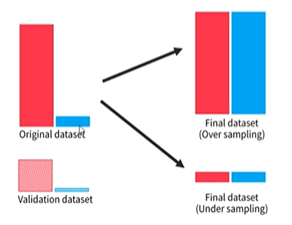

## Over sampling 방식

In [15]:
# class count
count_class_0, count_class_1 = df['Personal Loan'].value_counts()

df_class_0 = df[df['Personal Loan']==0]
df_class_1 = df[df['Personal Loan']==1]

In [16]:
count_class_0, count_class_1

(4520, 480)

In [17]:
df_class_0.shape

(4520, 11)

In [18]:
df_class_1.shape

(480, 11)

In [19]:
df_class_1_over = df_class_1.sample(count_class_0, replace = True)
df_class_1_over

,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
3822,33,178,4,9.0,3,0,1,0,0,0,0
2502,31,178,2,6.0,2,0,1,0,0,1,0
2779,35,168,4,4.1,2,0,1,0,0,1,0
1373,35,135,3,0.3,3,0,1,0,0,1,0
3573,36,165,3,5.6,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
321,20,101,3,4.4,2,82,1,0,0,0,0
3843,7,129,4,5.2,2,0,1,0,0,0,1
2443,3,161,4,1.7,3,422,1,0,1,1,1
528,39,122,4,0.2,1,378,1,0,0,1,0


In [21]:
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)
df_test_over

,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,49,4,1.6,1,0,0,1,0,0,0
1,19,34,3,1.5,1,0,0,1,0,0,0
2,15,11,1,1.0,1,0,0,0,0,0,0
3,9,100,1,2.7,2,0,0,0,0,0,0
4,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
321,20,101,3,4.4,2,82,1,0,0,0,0
3843,7,129,4,5.2,2,0,1,0,0,0,1
2443,3,161,4,1.7,3,422,1,0,1,1,1
528,39,122,4,0.2,1,378,1,0,0,1,0


In [22]:
print(df_test_over.shape)
print(df_test_over['Personal Loan'].value_counts())

(9040, 11)
1    4520
0    4520
Name: Personal Loan, dtype: int64


In [23]:
df_test_over.describe()

,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,9040.000000,9040.000000,9040.000000,9040.000000,9040.000000,9040.000000,9040.000000,9040.000000,9040.000000,9040.000000,9040.000000
mean,19.940819,105.156195,2.488496,2.811877,2.037058,77.355420,0.500000,0.114934,0.160841,0.599889,0.296792
std,11.505557,53.446555,1.136293,2.155927,0.821534,134.980688,0.500028,0.318959,0.367404,0.489948,0.456869
min,0.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,59.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,20.000000,110.000000,2.000000,2.400000,2.000000,0.000000,0.500000,0.000000,0.000000,1.000000,0.000000
75%,30.000000,151.000000,4.000000,4.100000,3.000000,121.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
X = df_test_over.drop('Personal Loan', axis=1)
y = df_test_over['Personal Loan']

In [26]:
# 훈련 평가데이터 나누기

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6328, 10) (2712, 10) (6328,) (2712,)


In [27]:
stcsc = StandardScaler() #함수의 활성화

X_train.iloc[:,:] = stcsc.fit_transform(X_train.iloc[:,:])
X_test.iloc[:,:] = stcsc.transform(X_test.iloc[:,:])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [28]:
y_train.value_counts()

1    3164
0    3164
Name: Personal Loan, dtype: int64

In [29]:
### 모델구축

mlp_model_over = MLPClassifier(random_state=1)
mlp_model_over.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=1)

In [30]:
## 평가용 데이터로 예측

y_pred_over = mlp_model_over.predict(X_test)
mlp_model_over.score(X_test, y_test)

0.9896755162241888

In [31]:
## 검증

confmat = pd.DataFrame(confusion_matrix(y_test, y_pred_over))
confmat

,0,1
0,1328,28
1,0,1356


In [32]:
print('오분류 개수: %d' % (y_test != y_pred_over).sum())
print('정확도: %.3f' % accuracy_score(y_test, y_pred_over))
print('정밀도: %.3f' % precision_score(y_test, y_pred_over))
print('재현율: %.3f' % recall_score(y_test, y_pred_over))
print('f1: %.3f' % f1_score(y_test, y_pred_over))
print('auc: %.3f' % roc_auc_score(y_test, y_pred_over))

오분류 개수: 28
정확도: 0.990
정밀도: 0.980
재현율: 1.000
f1: 0.990
auc: 0.990


## SMOTE 방식

In [33]:
df = pd.read_csv('D:/FinancialDataMining/data/clean_PersonalLoan.csv')

In [34]:
X = df.drop('Personal Loan', axis = 1)
y = df['Personal Loan']

In [35]:
from imblearn.over_sampling import SMOTE

In [37]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

1    4520
0    4520
Name: Personal Loan, dtype: int64

In [38]:
# 훈련 평가데이터 나누기

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=1, stratify=y_sm)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6328, 10) (2712, 10) (6328,) (2712,)


In [39]:
stcsc = StandardScaler() #함수의 활성화

X_train.iloc[:,:] = stcsc.fit_transform(X_train.iloc[:,:])
X_test.iloc[:,:] = stcsc.transform(X_test.iloc[:,:])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [40]:
### 모델구축

mlp_model = MLPClassifier(random_state=1)
mlp_model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=1)

In [41]:
## 평가용 데이터로 예측

y_pred = mlp_model.predict(X_test)
mlp_model.score(X_test, y_test)

0.9642330383480826

In [42]:
## 검증

confmat = pd.DataFrame(confusion_matrix(y_test, y_pred))
confmat

,0,1
0,1290,66
1,31,1325


In [43]:
print('오분류 개수: %d' % (y_test != y_pred).sum())
print('정확도: %.3f' % accuracy_score(y_test, y_pred))
print('정밀도: %.3f' % precision_score(y_test, y_pred))
print('재현율: %.3f' % recall_score(y_test, y_pred))
print('f1: %.3f' % f1_score(y_test, y_pred))
print('auc: %.3f' % roc_auc_score(y_test, y_pred))

오분류 개수: 97
정확도: 0.964
정밀도: 0.953
재현율: 0.977
f1: 0.965
auc: 0.964
